## Install libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Visualise data

In [2]:
df=pd.read_csv(r'D:\Downloads\global_cancer_patients_2015_2024.csv')
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [4]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [5]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [6]:
df.drop(columns=['Patient_ID'], inplace=True, errors='ignore')
df.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


###  Divide features into numerical and categorical, then further divide numerical into discrete and continuous, and visualize them


In [7]:
# Analyze feature types and categorize them
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)
print("\n" + "="*50)

# Define feature categories based on the data
categorical_features = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

# Numerical features - need to check which are continuous vs discrete
numerical_features = ['Age', 'Year', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 
                     'Obesity_Level', 'Treatment_Cost_USD', 'Genetic_Risk', 'Survival_Years', 'Target_Severity_Score']

print("CATEGORICAL FEATURES:")
print("="*30)
for feature in categorical_features:
    unique_count = df[feature].nunique()
    print(f"{feature}: {unique_count} unique values")
    print(f"  Sample values: {df[feature].unique()[:5]}")
    print()

print("NUMERICAL FEATURES:")
print("="*30)
for feature in numerical_features:
    unique_count = df[feature].nunique()
    min_val = df[feature].min()
    max_val = df[feature].max()
    print(f"{feature}: {unique_count} unique values, Range: {min_val} - {max_val}")
    print(f"  Sample values: {sorted(df[feature].unique())[:10]}")
    print()

Dataset Shape: (50000, 14)

Column Data Types:
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

CATEGORICAL FEATURES:
Gender: 3 unique values
  Sample values: ['Male' 'Female' 'Other']

Country_Region: 10 unique values
  Sample values: ['UK' 'China' 'Pakistan' 'Brazil' 'Germany']

Cancer_Type: 8 unique values
  Sample values: ['Lung' 'Leukemia' 'Breast' 'Colon' 'Skin']

Cancer_Stage: 5 unique values
  Sample values: ['Stage III' 'Stage 0' 'Stage II' 'Stage I' 'Stage IV']

NUMERICAL FEATURES:
Age: 70 unique values, Range: 20 - 89
  Sample values: [20, 21, 22, 23, 24,

In [8]:
# Categorize numerical features into continuous and discrete
print("FEATURE CATEGORIZATION:")
print("="*50)

# Categorical Features
categorical_features = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

# Discrete Numerical Features (countable, finite values)
discrete_features = [ 'Year']

# Continuous Numerical Features (can take any value within a range)
continuous_features = ['Age','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Survival_Years', 'Obesity_Level', 
                      'Treatment_Cost_USD', 'Target_Severity_Score']

print("📊 CATEGORICAL FEATURES:", len(categorical_features))
for feature in categorical_features:
    print(f"   • {feature}")

print(f"\n🔢 DISCRETE NUMERICAL FEATURES:", len(discrete_features))
for feature in discrete_features:
    print(f"   • {feature}")

print(f"\n📈 CONTINUOUS NUMERICAL FEATURES:", len(continuous_features))
for feature in continuous_features:
    print(f"   • {feature}")

print(f"\n📋 SUMMARY:")
print(f"   Total Features: {len(categorical_features) + len(discrete_features) + len(continuous_features)}")
print(f"   Categorical: {len(categorical_features)}")
print(f"   Numerical: {len(discrete_features) + len(continuous_features)} (Discrete: {len(discrete_features)}, Continuous: {len(continuous_features)})")

# Store feature lists for later use
feature_categories = {
    'categorical': categorical_features,
    'discrete_numerical': discrete_features,
    'continuous_numerical': continuous_features
}

FEATURE CATEGORIZATION:
📊 CATEGORICAL FEATURES: 4
   • Gender
   • Country_Region
   • Cancer_Type
   • Cancer_Stage

🔢 DISCRETE NUMERICAL FEATURES: 1
   • Year

📈 CONTINUOUS NUMERICAL FEATURES: 8
   • Age
   • Air_Pollution
   • Alcohol_Use
   • Smoking
   • Survival_Years
   • Obesity_Level
   • Treatment_Cost_USD
   • Target_Severity_Score

📋 SUMMARY:
   Total Features: 13
   Categorical: 4
   Numerical: 9 (Discrete: 1, Continuous: 8)


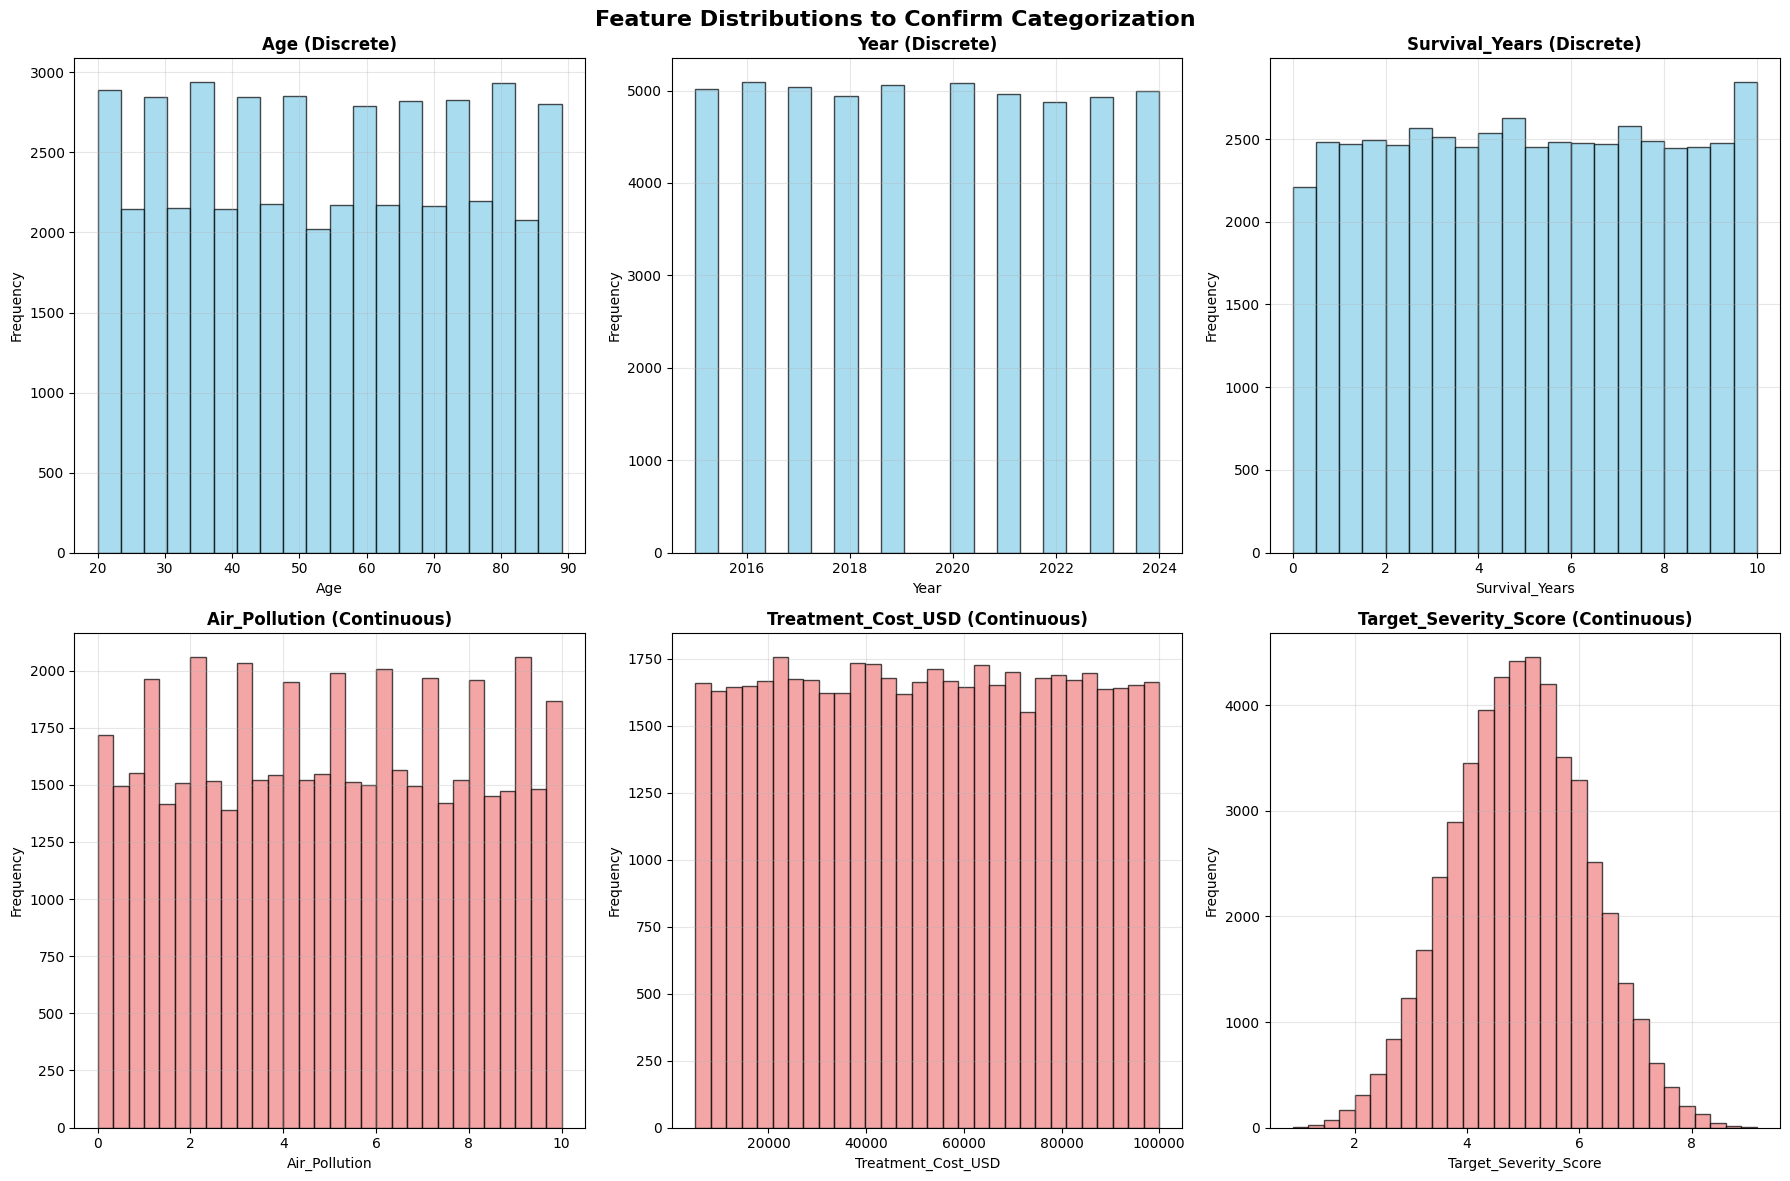


📊 BASIC STATISTICS BY CATEGORY:

🔢 DISCRETE FEATURES:
               Year
count  50000.000000
mean    2019.480520
std        2.871485
min     2015.000000
25%     2017.000000
50%     2019.000000
75%     2022.000000
max     2024.000000

📈 CONTINUOUS FEATURES:
                Age  Air_Pollution   Alcohol_Use       Smoking  \
count  50000.000000   50000.000000  50000.000000  50000.000000   
mean      54.421540       5.010126      5.010880      4.989826   
std       20.224451       2.888399      2.888769      2.881579   
min       20.000000       0.000000      0.000000      0.000000   
25%       37.000000       2.500000      2.500000      2.500000   
50%       54.000000       5.000000      5.000000      5.000000   
75%       72.000000       7.500000      7.500000      7.500000   
max       89.000000      10.000000     10.000000     10.000000   

       Survival_Years  Obesity_Level  Treatment_Cost_USD  \
count    50000.000000   50000.000000        50000.000000   
mean         5.006462     

In [9]:
# Visualize distributions to confirm feature categorization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Feature Distributions to Confirm Categorization', fontsize=16, fontweight='bold')

# Plot discrete features
discrete_to_plot = ['Age', 'Year', 'Survival_Years']
for i, feature in enumerate(discrete_to_plot):
    ax = axes[0, i]
    df[feature].hist(bins=20, ax=ax, color='skyblue', alpha=0.7, edgecolor='black')
    ax.set_title(f'{feature} (Discrete)', fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

# Plot some continuous features
continuous_to_plot = ['Air_Pollution', 'Treatment_Cost_USD', 'Target_Severity_Score']
for i, feature in enumerate(continuous_to_plot):
    ax = axes[1, i]
    df[feature].hist(bins=30, ax=ax, color='lightcoral', alpha=0.7, edgecolor='black')
    ax.set_title(f'{feature} (Continuous)', fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display basic statistics for each category
print("\n📊 BASIC STATISTICS BY CATEGORY:")
print("="*50)

print("\n🔢 DISCRETE FEATURES:")
print(df[discrete_features].describe())

print("\n📈 CONTINUOUS FEATURES:")
print(df[continuous_features].describe())

## No dublicates

In [10]:
# Check for duplicates
print("🔍 DUPLICATE ANALYSIS:")
print("="*50)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")



🔍 DUPLICATE ANALYSIS:
Total duplicate rows: 0


📊 OUTLIER ANALYSIS - BOX PLOTS:


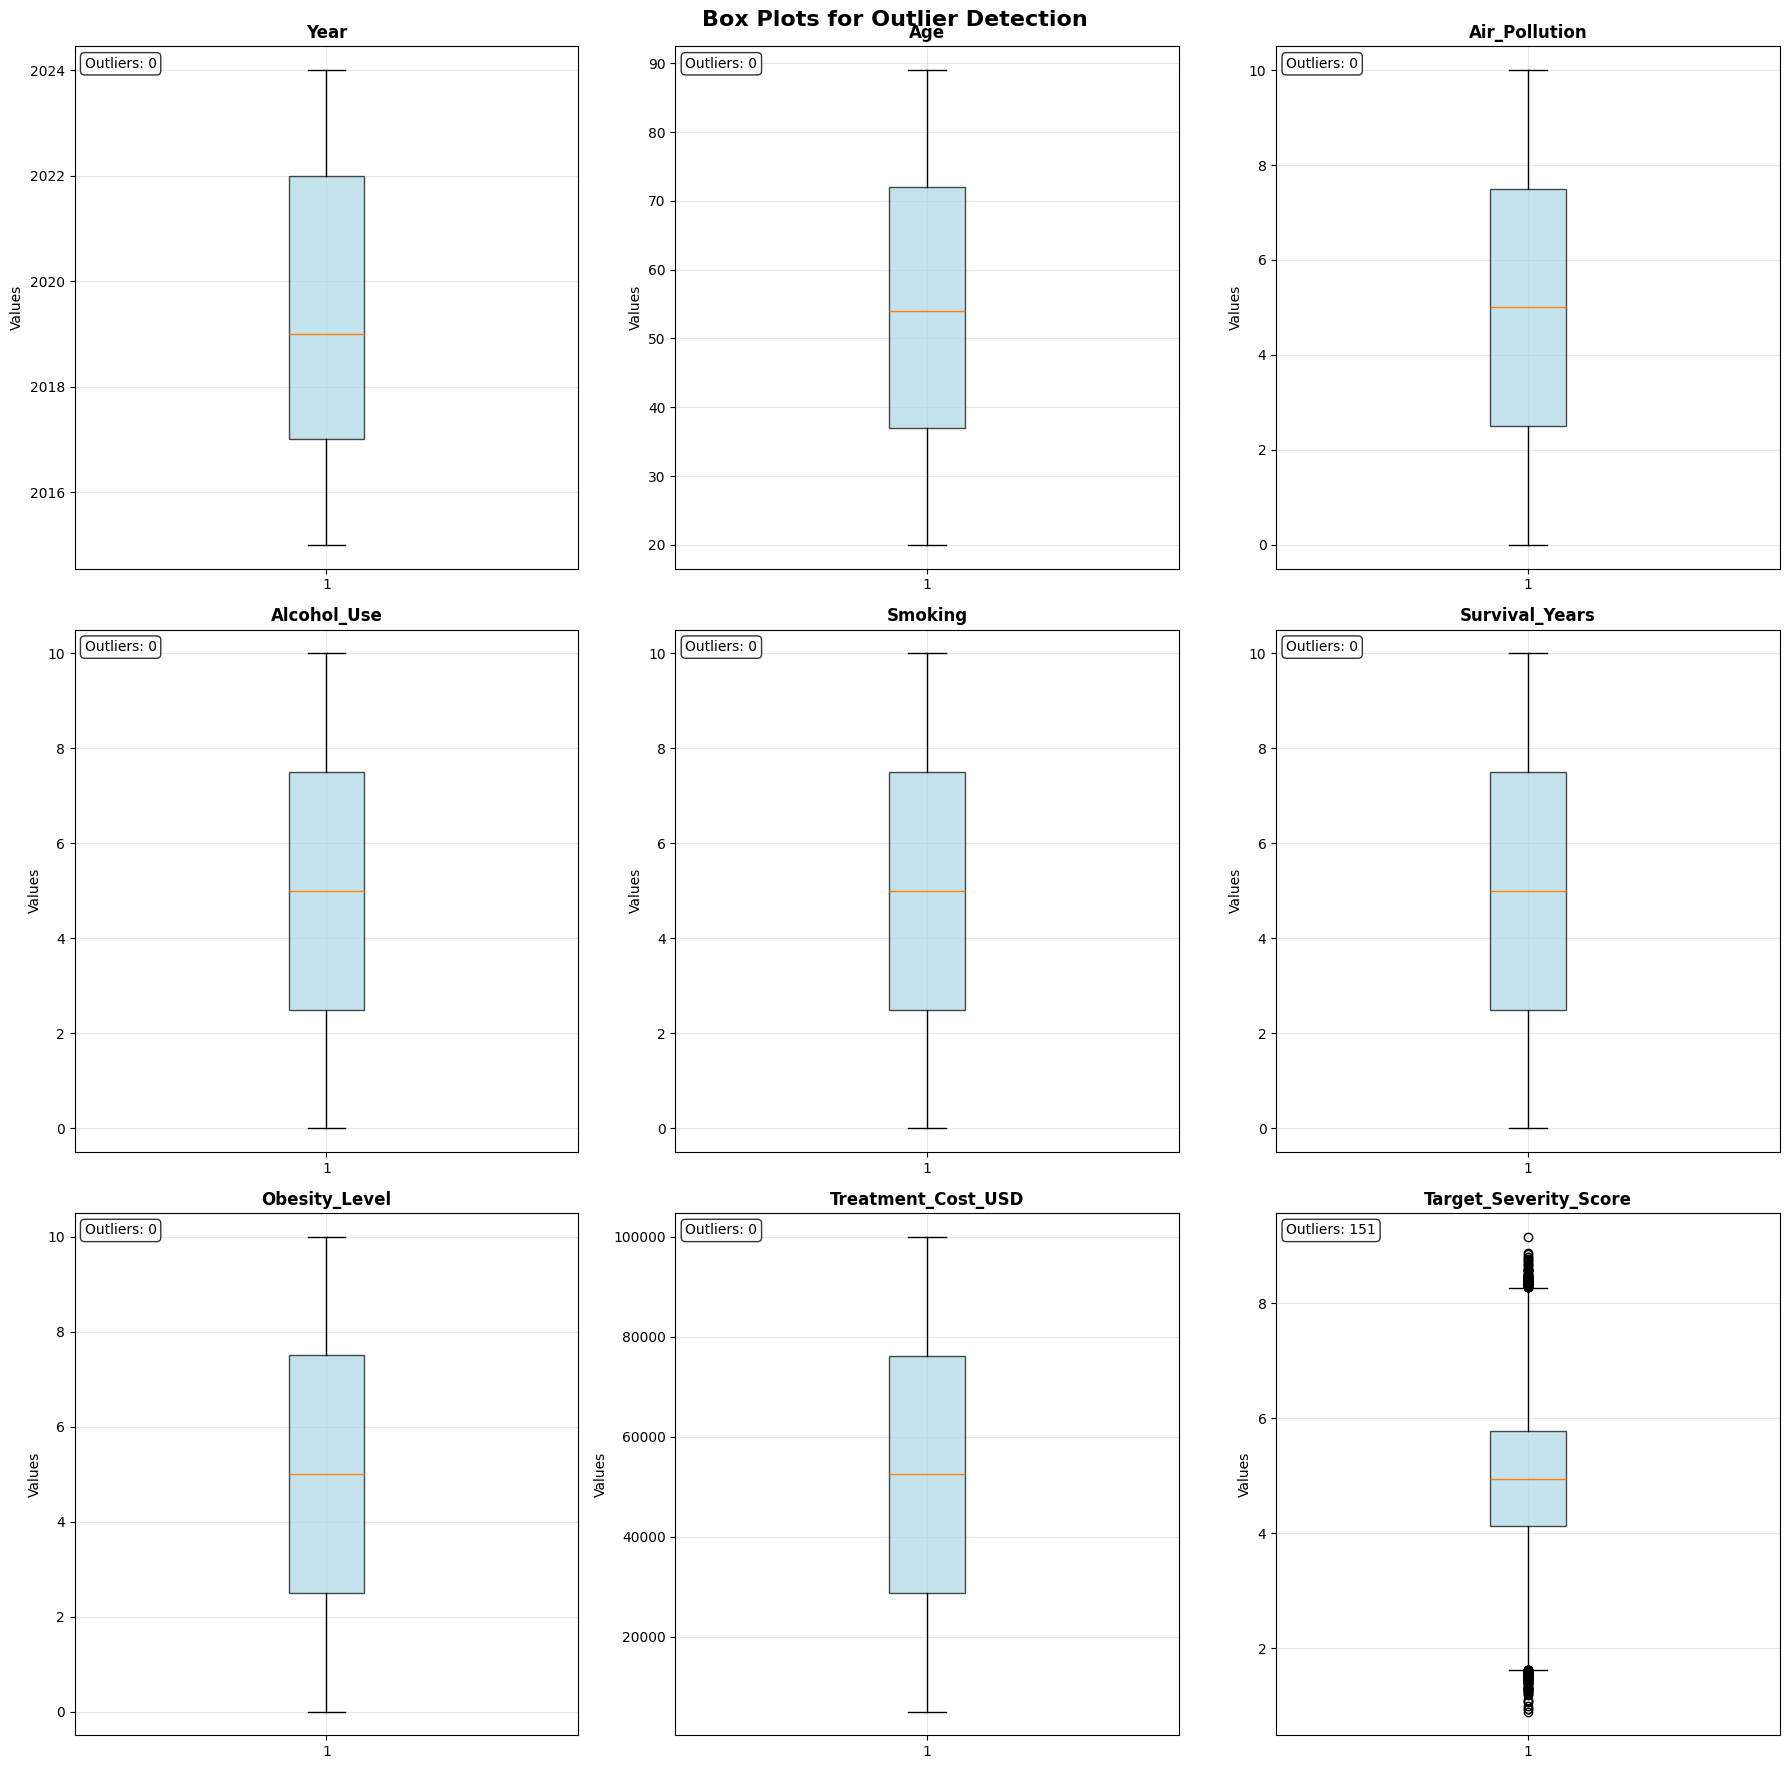

In [11]:
# Box plots for outlier detection
print("📊 OUTLIER ANALYSIS - BOX PLOTS:")
print("="*50)

# Get all numerical features for box plots
numerical_features = discrete_features + continuous_features

# Create box plots for numerical features
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

# Flatten axes array if it's multidimensional
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes] if n_cols == 1 else axes

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    
    # Create box plot
    box_plot = ax.boxplot(df[feature].dropna(), patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][0].set_alpha(0.7)
    
    ax.set_title(f'{feature}', fontweight='bold')
    ax.set_ylabel('Values')
    ax.grid(True, alpha=0.3)
    
    # Add some statistics as text
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    ax.text(0.02, 0.98, f'Outliers: {len(outliers)}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Hide empty subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## there is outlier in Target but i train model not sensitive to it 

In [12]:
# Detailed outlier analysis using IQR method
print("🔍 DETAILED OUTLIER ANALYSIS:")
print("="*60)

outlier_summary = []

for feature in numerical_features:
    # Calculate IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': feature,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': outlier_percentage
    })
    
    print(f"\n📈 {feature}:")
    print(f"   Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"   Outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"   Outliers found: {outlier_count} ({outlier_percentage:.2f}%)")
    
    if outlier_count > 0:
        print(f"   Outlier values range: {outliers[feature].min():.2f} to {outliers[feature].max():.2f}")

# Create summary DataFrame
outlier_df = pd.DataFrame(outlier_summary)
print(f"\n📊 OUTLIER SUMMARY TABLE:")
print("="*60)
print(outlier_df.round(2))

# Features with significant outliers (>5%)
significant_outliers = outlier_df[outlier_df['Outlier_Percentage'] > 5]
if not significant_outliers.empty:
    print(f"\n⚠️  FEATURES WITH SIGNIFICANT OUTLIERS (>5%):")
    print(significant_outliers[['Feature', 'Outlier_Count', 'Outlier_Percentage']].round(2))
else:
    print(f"\n✅ No features have significant outlier issues (>5%)")

🔍 DETAILED OUTLIER ANALYSIS:

📈 Year:
   Q1: 2017.00, Q3: 2022.00, IQR: 5.00
   Outlier bounds: [2009.50, 2029.50]
   Outliers found: 0 (0.00%)

📈 Age:
   Q1: 37.00, Q3: 72.00, IQR: 35.00
   Outlier bounds: [-15.50, 124.50]
   Outliers found: 0 (0.00%)

📈 Air_Pollution:
   Q1: 2.50, Q3: 7.50, IQR: 5.00
   Outlier bounds: [-5.00, 15.00]
   Outliers found: 0 (0.00%)

📈 Alcohol_Use:
   Q1: 2.50, Q3: 7.50, IQR: 5.00
   Outlier bounds: [-5.00, 15.00]
   Outliers found: 0 (0.00%)

📈 Smoking:
   Q1: 2.50, Q3: 7.50, IQR: 5.00
   Outlier bounds: [-5.00, 15.00]
   Outliers found: 0 (0.00%)

📈 Survival_Years:
   Q1: 2.50, Q3: 7.50, IQR: 5.00
   Outlier bounds: [-5.00, 15.00]
   Outliers found: 0 (0.00%)

📈 Obesity_Level:
   Q1: 2.50, Q3: 7.50, IQR: 5.00
   Outlier bounds: [-5.00, 15.00]
   Outliers found: 0 (0.00%)

📈 Treatment_Cost_USD:
   Q1: 28686.22, Q3: 76232.72, IQR: 47546.50
   Outlier bounds: [-42633.52, 147552.46]
   Outliers found: 0 (0.00%)

📈 Target_Severity_Score:
   Q1: 4.12, Q3: 5.

## Categorical feature encoding

In [ ]:
# 
print("🔧 CATEGORICAL FEATURE ENCODING:")
print("="*50)

# Import necessary libraries for encoding
from sklearn.preprocessing import LabelEncoder


print("Original categorical features:")
for feature in categorical_features:
    print(f"  {feature}: {df[feature].unique()}")

print("\n" + "-"*50)

# 1. DUMMY ENCODING for Gender (convert to 0/1 instead of True/False)
print("\n1️⃣ DUMMY ENCODING for Gender:")
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender', dtype=int)
print(f"Gender dummy columns created: {list(gender_dummies.columns)}")

# Add dummy columns to the dataframe and drop original
df = pd.concat([df, gender_dummies], axis=1)
df.drop('Gender', axis=1, inplace=True)

print("Sample of Gender encoding:")
print(gender_dummies.head())

print("\n" + "-"*50)

🔧 CATEGORICAL FEATURE ENCODING:
Original categorical features:
  Gender: ['Male' 'Female' 'Other']
  Country_Region: ['UK' 'China' 'Pakistan' 'Brazil' 'Germany' 'Canada' 'USA' 'India'
 'Australia' 'Russia']
  Cancer_Type: ['Lung' 'Leukemia' 'Breast' 'Colon' 'Skin' 'Cervical' 'Prostate' 'Liver']
  Cancer_Stage: ['Stage III' 'Stage 0' 'Stage II' 'Stage I' 'Stage IV']

--------------------------------------------------

1️⃣ DUMMY ENCODING for Gender:
Gender dummy columns created: ['Gender_Female', 'Gender_Male', 'Gender_Other']
Sample of Gender encoding:
   Gender_Female  Gender_Male  Gender_Other
0              0            1             0
1              0            1             0
2              0            1             0
3              0            1             0
4              1            0             0

--------------------------------------------------
Original categorical features:
  Gender: ['Male' 'Female' 'Other']
  Country_Region: ['UK' 'China' 'Pakistan' 'Brazil' 'German

In [14]:
import category_encoders as ce
# 2. BINARY ENCODING for other categorical features
print("2️⃣ BINARY ENCODING for other categorical features:")

# Features to apply binary encoding (excluding Gender)
binary_features = ['Country_Region', 'Cancer_Type', 'Cancer_Stage']

# Initialize binary encoder
binary_encoder = ce.BinaryEncoder(cols=binary_features, return_df=True)

# Apply binary encoding
df_binary_encoded = binary_encoder.fit_transform(df[binary_features])

# Display information about binary encoding
print("\nBinary encoding results:")
for feature in binary_features:
    original_unique = df[feature].nunique()
    binary_cols = [col for col in df_binary_encoded.columns if col.startswith(feature)]
    print(f"  {feature}: {original_unique} categories → {len(binary_cols)} binary columns")
    print(f"    Binary columns: {binary_cols}")

print("\nSample of binary encoded features:")
print(df_binary_encoded.head())

# Store original shape for comparison
original_shape = df.shape

# Remove original categorical columns and add binary encoded columns to df directly
df = df.drop(columns=binary_features)
df = pd.concat([df, df_binary_encoded], axis=1)

print(f"\n📊 Dataset transformation:")
print(f"Original shape: {original_shape}")
print(f"New shape: {df.shape}")
print(f"Columns removed: {len(binary_features)} categorical columns")
print(f"Columns added: {len(df_binary_encoded.columns)} binary encoded columns")
print(f"Net change: +{df.shape[1] - original_shape[1]} columns")

print(f"\n✅ All encoding applied directly to 'df'")
print(f"   Current df shape: {df.shape}")
print(f"   Ready for machine learning models!")

2️⃣ BINARY ENCODING for other categorical features:

Binary encoding results:
  Country_Region: 10 categories → 4 binary columns
    Binary columns: ['Country_Region_0', 'Country_Region_1', 'Country_Region_2', 'Country_Region_3']
  Cancer_Type: 8 categories → 4 binary columns
    Binary columns: ['Cancer_Type_0', 'Cancer_Type_1', 'Cancer_Type_2', 'Cancer_Type_3']
  Cancer_Stage: 5 categories → 3 binary columns
    Binary columns: ['Cancer_Stage_0', 'Cancer_Stage_1', 'Cancer_Stage_2']

Sample of binary encoded features:
   Country_Region_0  Country_Region_1  Country_Region_2  Country_Region_3  \
0                 0                 0                 0                 1   
1                 0                 0                 1                 0   
2                 0                 0                 1                 1   
3                 0                 0                 0                 1   
4                 0                 1                 0                 0   

   Cancer_Ty

In [15]:
df.head()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,...,Country_Region_1,Country_Region_2,Country_Region_3,Cancer_Type_0,Cancer_Type_1,Cancer_Type_2,Cancer_Type_3,Cancer_Stage_0,Cancer_Stage_1,Cancer_Stage_2
0,71,2021,6.4,2.8,9.5,0.9,8.7,62913.44,5.9,4.92,...,0,0,1,0,0,0,1,0,0,1
1,34,2021,1.3,4.5,3.7,3.9,6.3,12573.41,4.7,4.65,...,0,1,0,0,0,1,0,0,1,0
2,80,2023,7.4,7.9,2.4,4.7,0.1,6984.33,7.1,5.84,...,0,1,1,0,0,1,1,0,1,1
3,40,2015,1.7,2.9,4.8,3.5,2.7,67446.25,1.6,3.12,...,0,0,1,0,1,0,0,1,0,0
4,43,2017,5.1,2.8,2.3,6.7,0.5,77977.12,2.9,3.62,...,1,0,0,0,1,0,1,0,0,1


In [16]:
# Display final encoded dataset summary
print("3️⃣ FINAL ENCODED DATASET SUMMARY:")
print("="*50)

print("📋 Column Information:")
print(f"Total columns: {len(df.columns)}")
print(f"Numerical features (unchanged): {len(discrete_features + continuous_features)}")

# Show all columns
print("\n🔤 All columns in encoded dataset:")
for i, col in enumerate(df.columns, 1):
    col_type = "Target" if col == "Target_Severity_Score" else "Feature"
    print(f"  {i:2d}. {col} ({col_type})")

print("\n📊 First 5 rows of encoded dataset:")
print(df.head())

print("\n🔍 Data types of encoded dataset:")
print(df.dtypes.value_counts())

print("\n✅ ENCODING SUMMARY:")
print("  • Gender: Dummy encoded (0/1 format)")
print("  • Country_Region: Binary encoded")  
print("  • Cancer_Type: Binary encoded")
print("  • Cancer_Stage: Binary encoded")
print("  • All numerical features: Unchanged")

# Check for any remaining object/string columns
object_columns = df.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print(f"\n⚠️  Remaining object columns: {list(object_columns)}")
else:
    print(f"\n✅ All features are now numerical!")
    
# Final dataset information
print(f"\n💾 Final dataset information:")
print(f"   Shape: {df.shape}")
print(f"   All transformations applied directly to 'df'")
print(f"   Ready for machine learning models!")

3️⃣ FINAL ENCODED DATASET SUMMARY:
📋 Column Information:
Total columns: 24
Numerical features (unchanged): 9

🔤 All columns in encoded dataset:
   1. Age (Feature)
   2. Year (Feature)
   3. Genetic_Risk (Feature)
   4. Air_Pollution (Feature)
   5. Alcohol_Use (Feature)
   6. Smoking (Feature)
   7. Obesity_Level (Feature)
   8. Treatment_Cost_USD (Feature)
   9. Survival_Years (Feature)
  10. Target_Severity_Score (Target)
  11. Gender_Female (Feature)
  12. Gender_Male (Feature)
  13. Gender_Other (Feature)
  14. Country_Region_0 (Feature)
  15. Country_Region_1 (Feature)
  16. Country_Region_2 (Feature)
  17. Country_Region_3 (Feature)
  18. Cancer_Type_0 (Feature)
  19. Cancer_Type_1 (Feature)
  20. Cancer_Type_2 (Feature)
  21. Cancer_Type_3 (Feature)
  22. Cancer_Stage_0 (Feature)
  23. Cancer_Stage_1 (Feature)
  24. Cancer_Stage_2 (Feature)

📊 First 5 rows of encoded dataset:
   Age  Year  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  \
0   71  2021           6.4          

In [17]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,...,Country_Region_1,Country_Region_2,Country_Region_3,Cancer_Type_0,Cancer_Type_1,Cancer_Type_2,Cancer_Type_3,Cancer_Stage_0,Cancer_Stage_1,Cancer_Stage_2
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207,...,0.399040,0.495600,0.503240,0.12498,0.502740,0.499700,0.49774,0.399580,0.400260,0.601300
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677,...,0.489706,0.499986,0.499995,0.33070,0.499997,0.500005,0.50000,0.489817,0.489956,0.489636
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000,...,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000,...,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


📊 TARGET SEVERITY ANALYSIS BY YEAR:


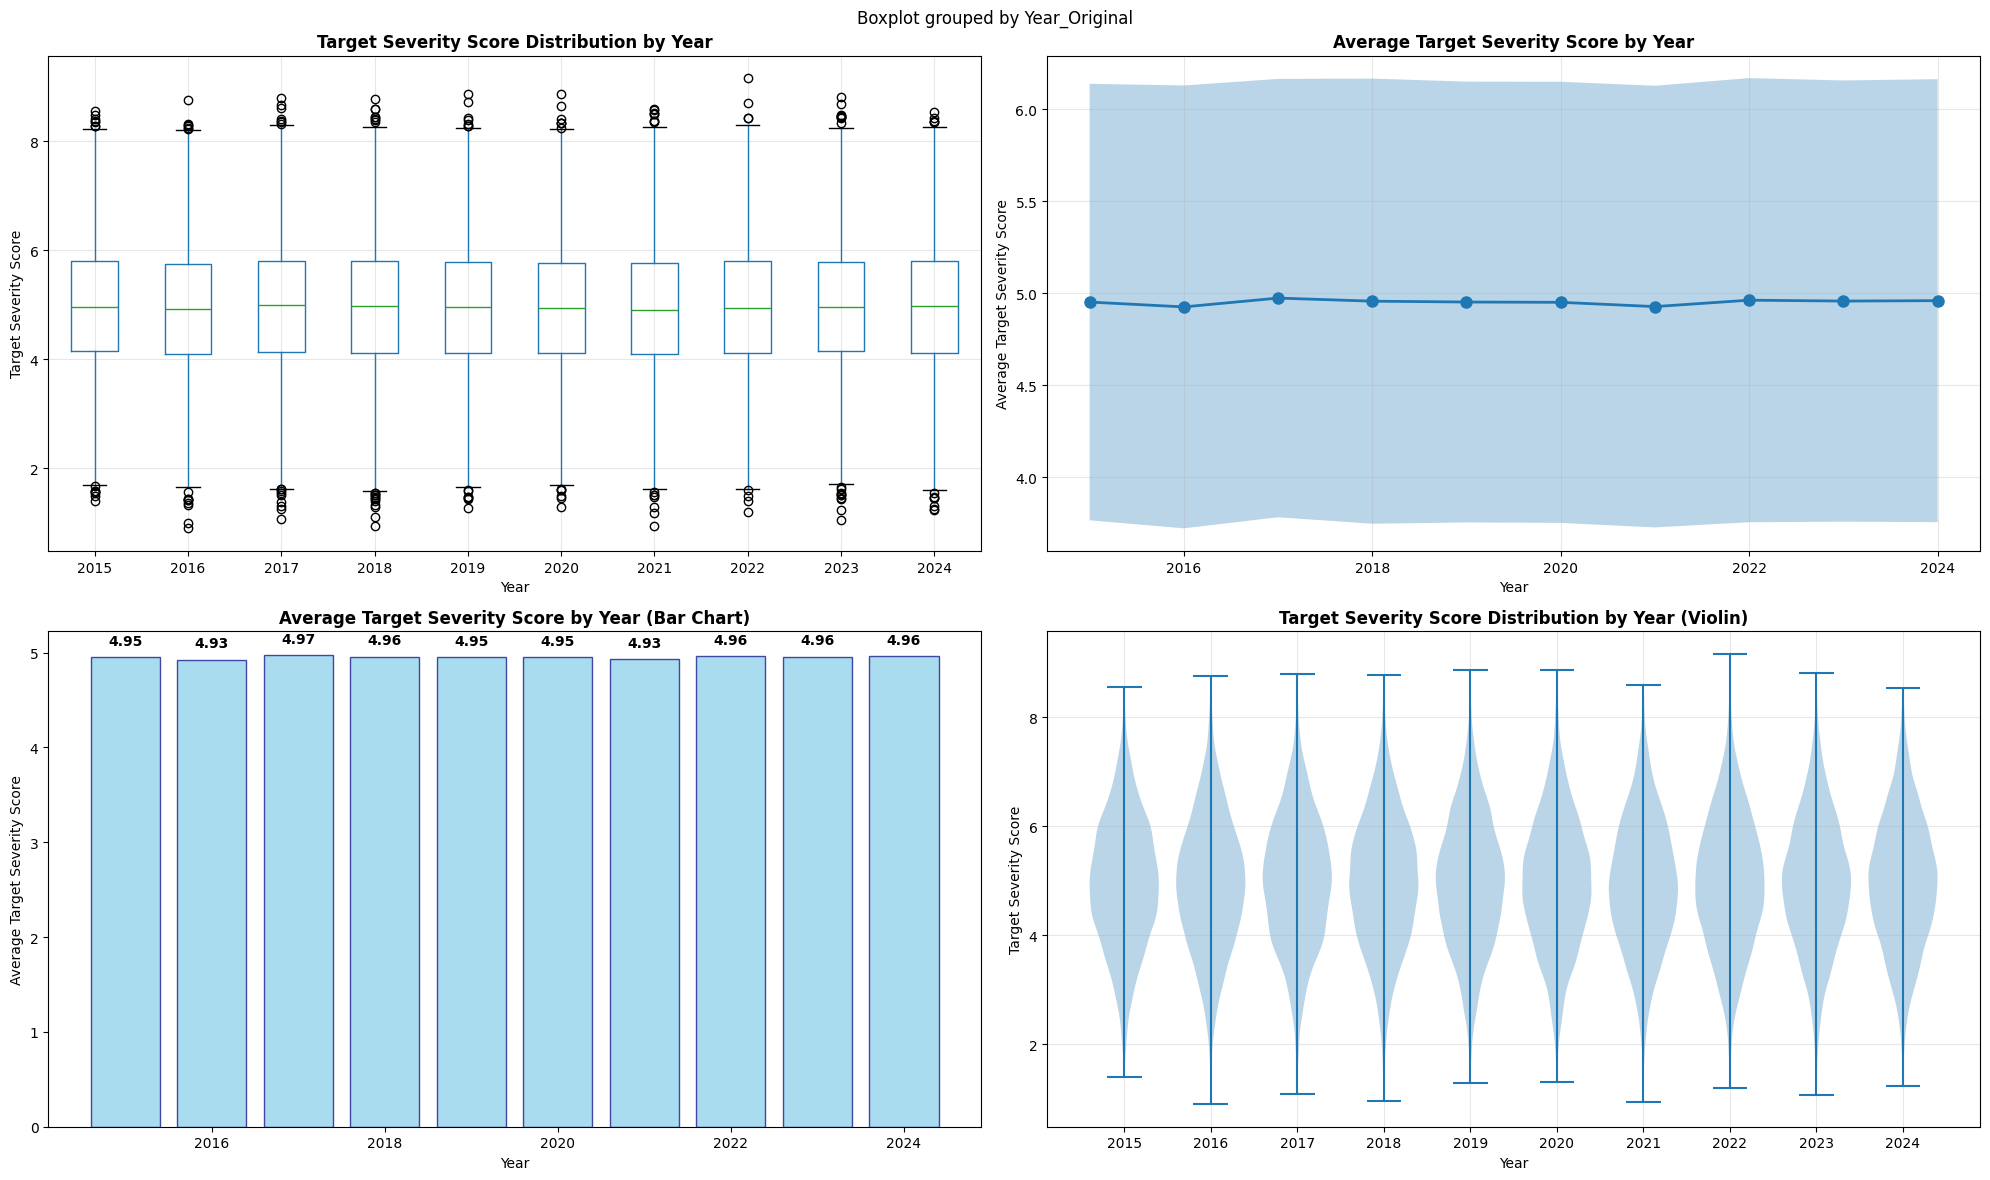

In [18]:
# Visualize Target_Severity_Score by Year
print("📊 TARGET SEVERITY ANALYSIS BY YEAR:")
print("="*50)

# Create visualizations to show relationship between Year and Target
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Target Severity Score Analysis by Year', fontsize=16, fontweight='bold')

# 1. Box Plot: Target by Year
ax1 = axes[0, 0]
df_boxplot = df.copy()
# Convert Year back to original values for better visualization
df_boxplot['Year_Original'] = df_boxplot['Year'] 
df_boxplot.boxplot(column='Target_Severity_Score', by='Year_Original', ax=ax1)
ax1.set_title('Target Severity Score Distribution by Year', fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Target Severity Score')
ax1.grid(True, alpha=0.3)

# 2. Line Plot: Average Target by Year
ax2 = axes[0, 1]
yearly_avg = df.groupby('Year')['Target_Severity_Score'].agg(['mean', 'std', 'count']).reset_index()
yearly_avg['Year_Original'] = yearly_avg['Year'] 

ax2.plot(yearly_avg['Year_Original'], yearly_avg['mean'], marker='o', linewidth=2, markersize=8)
ax2.fill_between(yearly_avg['Year_Original'], 
                yearly_avg['mean'] - yearly_avg['std'], 
                yearly_avg['mean'] + yearly_avg['std'], 
                alpha=0.3)
ax2.set_title('Average Target Severity Score by Year', fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Target Severity Score')
ax2.grid(True, alpha=0.3)

# 3. Bar Plot: Average Target by Year
ax3 = axes[1, 0]
bars = ax3.bar(yearly_avg['Year_Original'], yearly_avg['mean'], 
               color='skyblue', alpha=0.7, edgecolor='navy')
ax3.set_title('Average Target Severity Score by Year (Bar Chart)', fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Target Severity Score')

# Add value labels on bars
for bar, value in zip(bars, yearly_avg['mean']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# 4. Violin Plot: Distribution by Year
ax4 = axes[1, 1]
years_for_violin = sorted(df_boxplot['Year_Original'].unique())
violin_data = [df_boxplot[df_boxplot['Year_Original'] == year]['Target_Severity_Score'] 
               for year in years_for_violin]
ax4.violinplot(violin_data, positions=years_for_violin, widths=0.8)
ax4.set_title('Target Severity Score Distribution by Year (Violin)', fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Target Severity Score')
ax4.set_xticks(years_for_violin)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Detailed statistical analysis of Target by Year
print("\n📈 DETAILED YEAR-TARGET ANALYSIS:")
print("="*50)

# Calculate statistics for each year
yearly_stats = df.groupby('Year')['Target_Severity_Score'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(3)

# Add original year for better understanding
yearly_stats.index = yearly_stats.index + 2015
yearly_stats.index.name = 'Original_Year'

print("📊 Target Severity Score Statistics by Year:")
print(yearly_stats)

# Find the year with highest and lowest average target
max_year = yearly_stats['mean'].idxmax()
min_year = yearly_stats['mean'].idxmin()
max_value = yearly_stats.loc[max_year, 'mean']
min_value = yearly_stats.loc[min_year, 'mean']

print(f"\n🏆 KEY FINDINGS:")
print(f"   📈 Highest average target: {max_year} (avg = {max_value:.3f})")
print(f"   📉 Lowest average target:  {min_year} (avg = {min_value:.3f})")
print(f"   📊 Difference: {max_value - min_value:.3f}")

# Check for trend over time
from scipy import stats
years_numeric = yearly_stats.index.values
target_means = yearly_stats['mean'].values
correlation, p_value = stats.pearsonr(years_numeric, target_means)

print(f"\n📈 TREND ANALYSIS:")
print(f"   Correlation coefficient: {correlation:.4f}")
print(f"   P-value: {p_value:.4f}")

if p_value < 0.05:
    if correlation > 0:
        print("   ✅ Significant INCREASING trend over years")
    else:
        print("   ✅ Significant DECREASING trend over years")
else:
    print("   ⚪ No significant trend over years")

# Year-by-year comparison
print(f"\n📋 YEAR-BY-YEAR COMPARISON:")
for year in sorted(yearly_stats.index):
    count = yearly_stats.loc[year, 'count']
    mean_val = yearly_stats.loc[year, 'mean']
    std_val = yearly_stats.loc[year, 'std']
    print(f"   {year}: {count:4d} patients | Avg: {mean_val:.3f} | Std: {std_val:.3f}")

# Create a ranking
yearly_ranking = yearly_stats.sort_values('mean', ascending=False)
print(f"\n🏅 YEARS RANKED BY AVERAGE TARGET SEVERITY:")
for i, (year, row) in enumerate(yearly_ranking.iterrows(), 1):
    print(f"   {i}. {year}: {row['mean']:.3f} (±{row['std']:.3f})")


📈 DETAILED YEAR-TARGET ANALYSIS:
📊 Target Severity Score Statistics by Year:
               count   mean  median    std   min   max
Original_Year                                         
4030            5012  4.951   4.955  1.186  1.40  8.56
4031            5094  4.925   4.925  1.203  0.90  8.75
4032            5037  4.973   4.990  1.191  1.08  8.80
4033            4936  4.956   4.970  1.210  0.95  8.77
4034            5065  4.952   4.960  1.198  1.28  8.86
4035            5079  4.950   4.940  1.199  1.30  8.87
4036            4967  4.927   4.910  1.200  0.94  8.59
4037            4881  4.962   4.950  1.207  1.20  9.16
4038            4935  4.957   4.960  1.199  1.06  8.81
4039            4994  4.959   4.970  1.204  1.24  8.53

🏆 KEY FINDINGS:
   📈 Highest average target: 4032 (avg = 4.973)
   📉 Lowest average target:  4031 (avg = 4.925)
   📊 Difference: 0.048

📈 TREND ANALYSIS:
   Correlation coefficient: 0.1879
   P-value: 0.6032
   ⚪ No significant trend over years

📋 YEAR-BY-YEAR 

### Check if Year values are too large compared to other features

In [ ]:

print("🔍 FEATURE SCALE COMPARISON:")
print("="*50)

# Compare scales of all numerical features
numerical_cols = ['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 
                 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']

print("📊 Feature value ranges:")
scale_comparison = []
for col in numerical_cols:
    if col in df.columns:
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        range_val = max_val - min_val
        
        scale_comparison.append({
            'Feature': col,
            'Min': min_val,
            'Max': max_val,
            'Mean': mean_val,
            'Range': range_val
        })
        
        print(f"{col:20} | Min: {min_val:10.2f} | Max: {max_val:10.2f} | Mean: {mean_val:10.2f} | Range: {range_val:10.2f}")

# Convert to DataFrame for better analysis
scale_df = pd.DataFrame(scale_comparison)

print(f"\n⚠️  SCALE ISSUES DETECTED:")
print("="*30)
print("Year values (2015-2024) are MUCH larger than other features!")
print("This can cause problems with:")
print("  • Distance-based algorithms (KNN, SVM)")
print("  • Neural Networks")
print("  • Gradient-based optimization")
print("  • Regularized models (Ridge, Lasso)")

print(f"\n💡 SOLUTION: Scale the Year column!")
print("="*35)

🔍 FEATURE SCALE COMPARISON:
📊 Feature value ranges:
Age                  | Min:      20.00 | Max:      89.00 | Mean:      54.42 | Range:      69.00
Year                 | Min:    2015.00 | Max:    2024.00 | Mean:    2019.48 | Range:       9.00
Genetic_Risk         | Min:       0.00 | Max:      10.00 | Mean:       5.00 | Range:      10.00
Air_Pollution        | Min:       0.00 | Max:      10.00 | Mean:       5.01 | Range:      10.00
Alcohol_Use          | Min:       0.00 | Max:      10.00 | Mean:       5.01 | Range:      10.00
Smoking              | Min:       0.00 | Max:      10.00 | Mean:       4.99 | Range:      10.00
Obesity_Level        | Min:       0.00 | Max:      10.00 | Mean:       4.99 | Range:      10.00
Treatment_Cost_USD   | Min:    5000.05 | Max:   99999.84 | Mean:   52467.30 | Range:   94999.79
Survival_Years       | Min:       0.00 | Max:      10.00 | Mean:       5.01 | Range:      10.00
Target_Severity_Score | Min:       0.90 | Max:       9.16 | Mean:       4.95 | Range

## Rescale Year column by Substract 2015

In [21]:
# Apply scaling to Year column
print("🛠️ SCALING YEAR COLUMN:")
print("="*30)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Show original Year values
print("📊 Original Year values:")
print(f"   Range: {df['Year'].min()} to {df['Year'].max()}")
print(f"   Mean: {df['Year'].mean():.2f}")
print(f"   Sample values: {sorted(df['Year'].unique())}")

# Option 1: Convert to "Years since 2015" (Recommended)
print(f"\n🎯 APPLYING: Years since 2015 transformation")
df['Year'] = df['Year'] - 2015

print(f"✅ Year column transformed:")
print(f"   New range: {df['Year'].min()} to {df['Year'].max()}")
print(f"   New mean: {df['Year'].mean():.2f}")
print(f"   New values: {sorted(df['Year'].unique())}")

print(f"\n📈 Benefits of this transformation:")
print("  • Values now range from 0-9 (much better scale)")
print("  • Maintains temporal relationship")
print("  • Compatible with all ML algorithms")
print("  • No loss of information")

# Verify the transformation worked
print(f"\n🔍 Updated feature scales:")
updated_numerical_cols = ['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use']
for col in updated_numerical_cols:
    if col in df.columns:
        print(f"{col:15} | Range: {df[col].min():6.2f} to {df[col].max():6.2f}")
        
print(f"\n✅ Year column is now properly scaled!")

🛠️ SCALING YEAR COLUMN:
📊 Original Year values:
   Range: 2015 to 2024
   Mean: 2019.48
   Sample values: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

🎯 APPLYING: Years since 2015 transformation
✅ Year column transformed:
   New range: 0 to 9
   New mean: 4.48
   New values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

📈 Benefits of this transformation:
  • Values now range from 0-9 (much better scale)
  • Maintains temporal relationship
  • Compatible with all ML algorithms
  • No loss of information

🔍 Updated feature scales:
Age             | Range:  20.00 to  89.00
Year            | Range:   0.00 to   9.00
Genetic_Risk    | Range:   0.00 to  10.00
Air_Pollution   | Range:   0.00 to  10.00
Alcohol_Use     | Range:   0.00 to  10.00

✅ Year column is now properly scaled!


In [22]:
df.head()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,...,Country_Region_1,Country_Region_2,Country_Region_3,Cancer_Type_0,Cancer_Type_1,Cancer_Type_2,Cancer_Type_3,Cancer_Stage_0,Cancer_Stage_1,Cancer_Stage_2
0,71,6,6.4,2.8,9.5,0.9,8.7,62913.44,5.9,4.92,...,0,0,1,0,0,0,1,0,0,1
1,34,6,1.3,4.5,3.7,3.9,6.3,12573.41,4.7,4.65,...,0,1,0,0,0,1,0,0,1,0
2,80,8,7.4,7.9,2.4,4.7,0.1,6984.33,7.1,5.84,...,0,1,1,0,0,1,1,0,1,1
3,40,0,1.7,2.9,4.8,3.5,2.7,67446.25,1.6,3.12,...,0,0,1,0,1,0,0,1,0,0
4,43,2,5.1,2.8,2.3,6.7,0.5,77977.12,2.9,3.62,...,1,0,0,0,1,0,1,0,0,1


🔗 CORRELATION ANALYSIS:
📊 Correlation Matrix Shape: (10, 10)
Features analyzed: 10


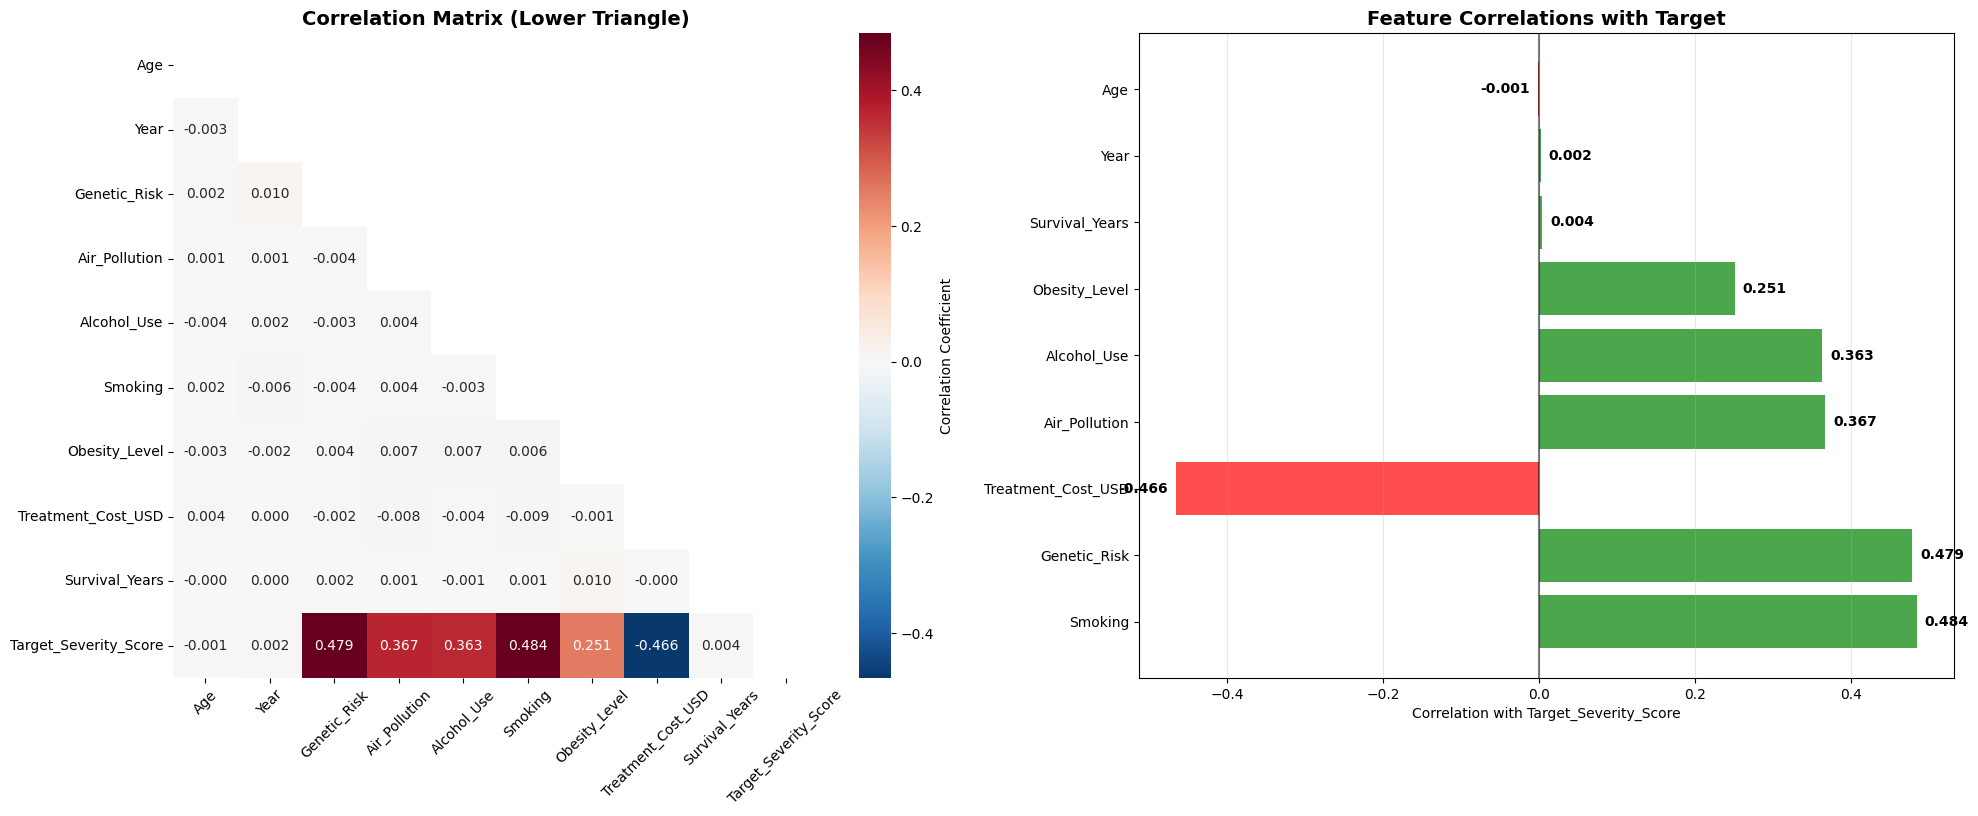

In [23]:
# Correlation Matrix and Feature-Target Correlation Analysis
print("🔗 CORRELATION ANALYSIS:")
print("="*50)

# Calculate correlation matrix for all numerical features
numerical_features_for_corr = ['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 
                              'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years', 
                              'Target_Severity_Score']

# Get only the columns that exist in the dataframe
existing_numerical = [col for col in numerical_features_for_corr if col in df.columns]

# Calculate correlation matrix
correlation_matrix = df[existing_numerical].corr()

print(f"📊 Correlation Matrix Shape: {correlation_matrix.shape}")
print(f"Features analyzed: {len(existing_numerical)}")

# Create correlation matrix heatmap
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Full Correlation Matrix
ax1 = axes[0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            square=True,
            ax=ax1,
            cbar_kws={'label': 'Correlation Coefficient'},
            mask=mask)
ax1.set_title('Correlation Matrix (Lower Triangle)', fontweight='bold', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# 2. Target Correlation Bar Plot
target_correlations = correlation_matrix['Target_Severity_Score'].drop('Target_Severity_Score').sort_values(key=abs, ascending=False)

ax2 = axes[1]
colors = ['red' if x < 0 else 'green' for x in target_correlations.values]
bars = ax2.barh(range(len(target_correlations)), target_correlations.values, color=colors, alpha=0.7)
ax2.set_yticks(range(len(target_correlations)))
ax2.set_yticklabels(target_correlations.index)
ax2.set_xlabel('Correlation with Target_Severity_Score')
ax2.set_title('Feature Correlations with Target', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3, axis='x')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, target_correlations.values)):
    ax2.text(value + (0.01 if value >= 0 else -0.01), i, f'{value:.3f}', 
             va='center', ha='left' if value >= 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

In [24]:
# Detailed Correlation Analysis with Target
print("\n📈 DETAILED TARGET CORRELATION ANALYSIS:")
print("="*55)

# Get correlations with target and sort by absolute value
target_correlations_detailed = correlation_matrix['Target_Severity_Score'].drop('Target_Severity_Score')
target_corr_sorted = target_correlations_detailed.sort_values(key=abs, ascending=False)

print("🎯 FEATURE CORRELATIONS WITH TARGET (sorted by strength):")
print("-" * 55)

# Categorize correlations
strong_positive = []
moderate_positive = []
weak_positive = []
weak_negative = []
moderate_negative = []
strong_negative = []

for feature, corr_value in target_corr_sorted.items():
    abs_corr = abs(corr_value)
    direction = "📈" if corr_value > 0 else "📉"
    
    if abs_corr >= 0.7:
        strength = "STRONG"
        if corr_value > 0:
            strong_positive.append((feature, corr_value))
        else:
            strong_negative.append((feature, corr_value))
    elif abs_corr >= 0.4:
        strength = "MODERATE"
        if corr_value > 0:
            moderate_positive.append((feature, corr_value))
        else:
            moderate_negative.append((feature, corr_value))
    else:
        strength = "WEAK"
        if corr_value > 0:
            weak_positive.append((feature, corr_value))
        else:
            weak_negative.append((feature, corr_value))
    
    print(f"{direction} {feature:20} | {corr_value:7.4f} | {strength}")

print(f"\n📊 CORRELATION SUMMARY:")
print("="*30)
print(f"🔴 Strong Correlations (|r| ≥ 0.70): {len(strong_positive + strong_negative)}")
if strong_positive:
    print("   📈 Strong Positive:", [f[0] for f in strong_positive])
if strong_negative:
    print("   📉 Strong Negative:", [f[0] for f in strong_negative])

print(f"🟡 Moderate Correlations (0.40 ≤ |r| < 0.70): {len(moderate_positive + moderate_negative)}")
if moderate_positive:
    print("   📈 Moderate Positive:", [f[0] for f in moderate_positive])
if moderate_negative:
    print("   📉 Moderate Negative:", [f[0] for f in moderate_negative])

print(f"⚪ Weak Correlations (|r| < 0.40): {len(weak_positive + weak_negative)}")
if weak_positive:
    print("   📈 Weak Positive:", [f[0] for f in weak_positive])
if weak_negative:
    print("   📉 Weak Negative:", [f[0] for f in weak_negative])


📈 DETAILED TARGET CORRELATION ANALYSIS:
🎯 FEATURE CORRELATIONS WITH TARGET (sorted by strength):
-------------------------------------------------------
📈 Smoking              |  0.4844 | MODERATE
📈 Genetic_Risk         |  0.4787 | MODERATE
📉 Treatment_Cost_USD   | -0.4661 | MODERATE
📈 Air_Pollution        |  0.3670 | WEAK
📈 Alcohol_Use          |  0.3632 | WEAK
📈 Obesity_Level        |  0.2514 | WEAK
📈 Survival_Years       |  0.0042 | WEAK
📈 Year                 |  0.0021 | WEAK
📉 Age                  | -0.0015 | WEAK

📊 CORRELATION SUMMARY:
🔴 Strong Correlations (|r| ≥ 0.70): 0
🟡 Moderate Correlations (0.40 ≤ |r| < 0.70): 3
   📈 Moderate Positive: ['Smoking', 'Genetic_Risk']
   📉 Moderate Negative: ['Treatment_Cost_USD']
⚪ Weak Correlations (|r| < 0.40): 6
   📈 Weak Positive: ['Air_Pollution', 'Alcohol_Use', 'Obesity_Level', 'Survival_Years', 'Year']
   📉 Weak Negative: ['Age']


In [25]:
# Data Splitting and Regression Model Preparation
print("🔀 DATA SPLITTING FOR REGRESSION:")
print("="*50)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Separate features and target
X = df.drop('Target_Severity_Score', axis=1)
y = df['Target_Severity_Score']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)



🔀 DATA SPLITTING FOR REGRESSION:


In [32]:
# Cross-Validation Analysis Before Final Model Training
print("🔄 K-FOLD CROSS VALIDATION ANALYSIS:")
print("="*60)

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Define models for cross-validation (same as final training)
cv_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=6)
}

# Set up K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"📊 Using 5-Fold Cross Validation")
print(f"📈 Training data shape: {X_train.shape}")
print(f"🎯 Target data shape: {y_train.shape}")
print("\n" + "-" * 60)

# Store cross-validation results
cv_results = {}
cv_summary = []

print("🔄 Performing Cross-Validation...")
print("-" * 40)

for name, model in cv_models.items():
    print(f"CV for {name}...", end=' ')
    
    try:
        # Perform cross-validation with R² scoring
        cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=kf, 
                                       scoring='r2', n_jobs=-1)
        
        # Perform cross-validation with negative MSE scoring
        cv_scores_mse = cross_val_score(model, X_train, y_train, cv=kf, 
                                        scoring='neg_mean_squared_error', n_jobs=-1)
        
        # Perform cross-validation with negative MAE scoring
        cv_scores_mae = cross_val_score(model, X_train, y_train, cv=kf, 
                                        scoring='neg_mean_absolute_error', n_jobs=-1)
        
        # Convert negative scores to positive
        cv_scores_mse = -cv_scores_mse
        cv_scores_mae = -cv_scores_mae
        
        # Store results
        cv_results[name] = {
            'r2_scores': cv_scores_r2,
            'mse_scores': cv_scores_mse,
            'mae_scores': cv_scores_mae,
            'r2_mean': cv_scores_r2.mean(),
            'r2_std': cv_scores_r2.std(),
            'mse_mean': cv_scores_mse.mean(),
            'mse_std': cv_scores_mse.std(),
            'mae_mean': cv_scores_mae.mean(),
            'mae_std': cv_scores_mae.std()
        }
        
        # Add to summary
        cv_summary.append({
            'Model': name,
            'CV_R²_Mean': cv_scores_r2.mean(),
            'CV_R²_Std': cv_scores_r2.std(),
            'CV_MSE_Mean': cv_scores_mse.mean(),
            'CV_MSE_Std': cv_scores_mse.std(),
            'CV_MAE_Mean': cv_scores_mae.mean(),
            'CV_MAE_Std': cv_scores_mae.std()
        })
        
        print(f"✅ R²: {cv_scores_r2.mean():.4f} (±{cv_scores_r2.std():.4f})")
        
    except Exception as e:
        print(f"❌ Error: {str(e)[:30]}...")
        cv_results[name] = None

print(f"\n✅ Cross-Validation completed!")
print(f"📊 Successfully validated: {len([r for r in cv_results.values() if r is not None])}/{len(cv_models)} models")

🔄 K-FOLD CROSS VALIDATION ANALYSIS:
📊 Using 5-Fold Cross Validation
📈 Training data shape: (40000, 23)
🎯 Target data shape: (40000,)

------------------------------------------------------------
🔄 Performing Cross-Validation...
----------------------------------------
CV for Linear Regression... ✅ R²: 1.0000 (±0.0000)
CV for Ridge Regression... ✅ R²: 1.0000 (±0.0000)
CV for Ridge Regression... ✅ R²: 1.0000 (±0.0000)
CV for Lasso Regression... ✅ R²: 1.0000 (±0.0000)
CV for Lasso Regression... ✅ R²: 0.6085 (±0.0047)
CV for ElasticNet... ✅ R²: 0.6085 (±0.0047)
CV for ElasticNet... ✅ R²: 0.8761 (±0.0015)
CV for Decision Tree... ✅ R²: 0.8761 (±0.0015)
CV for Decision Tree... ✅ R²: 0.8856 (±0.0028)
CV for Random Forest... ✅ R²: 0.8856 (±0.0028)
CV for Random Forest... ✅ R²: 0.9554 (±0.0010)
CV for Gradient Boosting... ✅ R²: 0.9554 (±0.0010)
CV for Gradient Boosting... ✅ R²: 0.9945 (±0.0002)

✅ Cross-Validation completed!
📊 Successfully validated: 7/7 models
✅ R²: 0.9945 (±0.0002)

✅ Cross-Va


📊 DETAILED CROSS-VALIDATION RESULTS:
🎯 Cross-Validation Performance Summary:
--------------------------------------------------
            Model  CV_R²_Mean  CV_R²_Std  CV_MSE_Mean  CV_MSE_Std  CV_MAE_Mean  CV_MAE_Std
Linear Regression      1.0000     0.0000       0.0000      0.0000       0.0025      0.0000
 Ridge Regression      1.0000     0.0000       0.0000      0.0000       0.0025      0.0000
 Lasso Regression      0.6085     0.0047       0.5652      0.0056       0.6060      0.0033
       ElasticNet      0.8761     0.0015       0.1788      0.0019       0.3408      0.0020
    Decision Tree      0.8856     0.0028       0.1651      0.0026       0.3277      0.0025
    Random Forest      0.9554     0.0010       0.0644      0.0014       0.2031      0.0021
Gradient Boosting      0.9945     0.0002       0.0079      0.0003       0.0707      0.0012

🏆 MODEL RANKING BY CROSS-VALIDATION R²:
 1. Linear Regression    | R²: 1.0000 (±0.0000) | Stable
 2. Ridge Regression     | R²: 1.0000 (±0.000

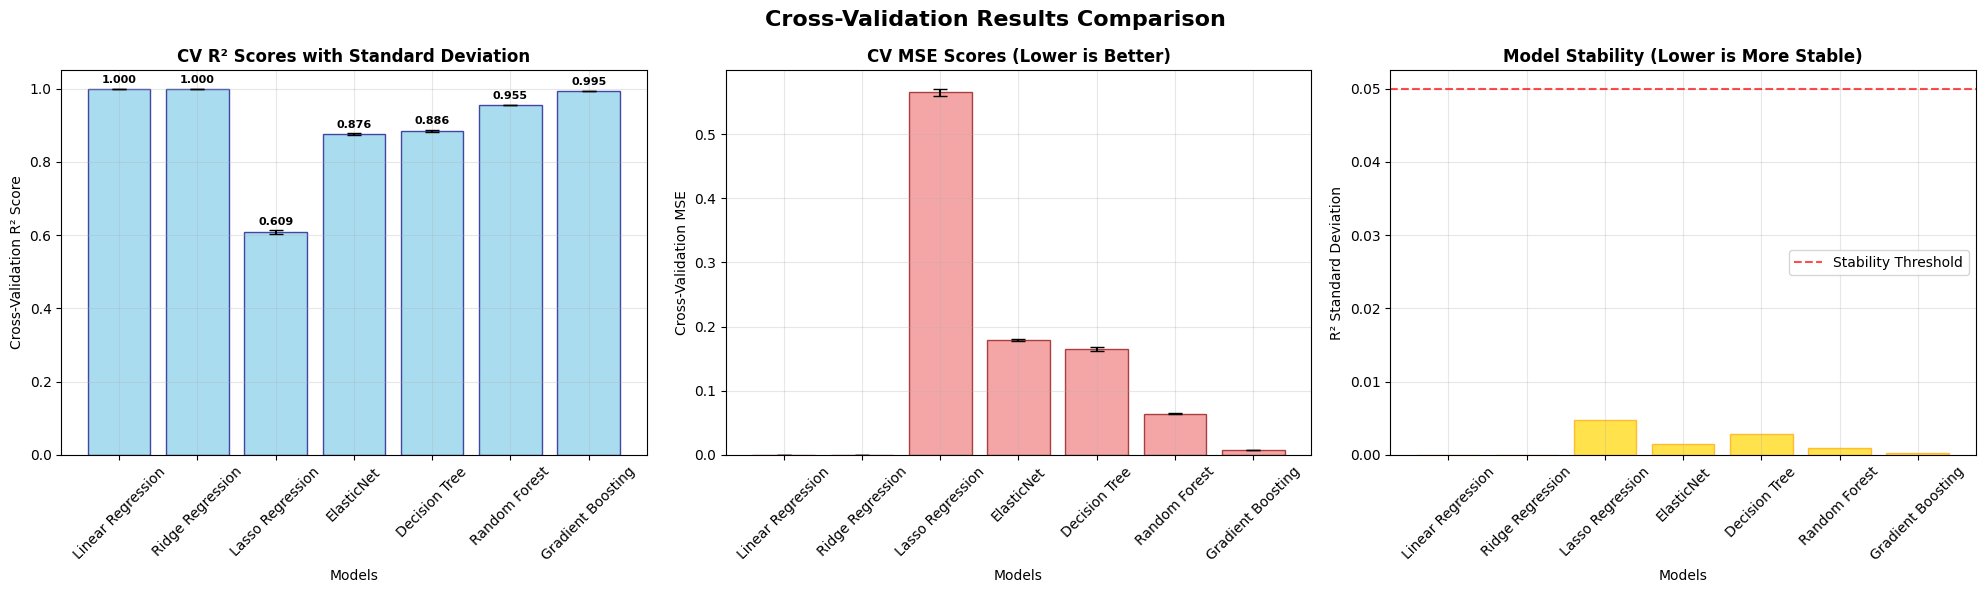


🎯 CROSS-VALIDATION RECOMMENDATIONS:
🥇 Best CV Performance: Linear Regression
   📊 CV R² Score: 1.0000 ± 0.0000
🔒 Most Stable Model: Linear Regression
   📊 CV R² Score: 1.0000 ± 0.0000

💡 These CV results will help validate the final model training results!
📈 Expected performance range: 1.0000 to 1.0000


In [33]:
# Cross-Validation Results Analysis and Visualization
print("\n📊 DETAILED CROSS-VALIDATION RESULTS:")
print("="*60)

# Create summary DataFrame
cv_summary_df = pd.DataFrame(cv_summary)
cv_summary_df = cv_summary_df.round(4)

print("🎯 Cross-Validation Performance Summary:")
print("-" * 50)
print(cv_summary_df.to_string(index=False))

# Rank models by CV R² score
print(f"\n🏆 MODEL RANKING BY CROSS-VALIDATION R²:")
print("="*45)
cv_ranking = cv_summary_df.sort_values('CV_R²_Mean', ascending=False)
for i, (_, row) in enumerate(cv_ranking.iterrows(), 1):
    stability = "Stable" if row['CV_R²_Std'] < 0.05 else "Variable"
    print(f"{i:2d}. {row['Model']:20} | R²: {row['CV_R²_Mean']:.4f} (±{row['CV_R²_Std']:.4f}) | {stability}")

# Identify most stable models
print(f"\n📈 MODEL STABILITY ANALYSIS:")
print("="*30)
stable_models = cv_summary_df[cv_summary_df['CV_R²_Std'] < 0.05]
variable_models = cv_summary_df[cv_summary_df['CV_R²_Std'] >= 0.05]

print(f"✅ Stable Models (Std < 0.05): {len(stable_models)}")
for _, row in stable_models.iterrows():
    print(f"   • {row['Model']}: R² = {row['CV_R²_Mean']:.4f} ± {row['CV_R²_Std']:.4f}")

if len(variable_models) > 0:
    print(f"\n⚠️  Variable Models (Std ≥ 0.05): {len(variable_models)}")
    for _, row in variable_models.iterrows():
        print(f"   • {row['Model']}: R² = {row['CV_R²_Mean']:.4f} ± {row['CV_R²_Std']:.4f}")

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Cross-Validation Results Comparison', fontsize=16, fontweight='bold')

# 1. R² Score comparison with error bars
ax1 = axes[0]
models_names = cv_summary_df['Model'].tolist()
r2_means = cv_summary_df['CV_R²_Mean'].tolist()
r2_stds = cv_summary_df['CV_R²_Std'].tolist()

bars = ax1.bar(models_names, r2_means, yerr=r2_stds, capsize=5, 
               color='skyblue', alpha=0.7, edgecolor='navy')
ax1.set_xlabel('Models')
ax1.set_ylabel('Cross-Validation R² Score')
ax1.set_title('CV R² Scores with Standard Deviation', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add value labels
for bar, mean_val, std_val in zip(bars, r2_means, r2_stds):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std_val + 0.01,
             f'{mean_val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# 2. MSE comparison
ax2 = axes[1]
mse_means = cv_summary_df['CV_MSE_Mean'].tolist()
mse_stds = cv_summary_df['CV_MSE_Std'].tolist()

bars = ax2.bar(models_names, mse_means, yerr=mse_stds, capsize=5,
               color='lightcoral', alpha=0.7, edgecolor='darkred')
ax2.set_xlabel('Models')
ax2.set_ylabel('Cross-Validation MSE')
ax2.set_title('CV MSE Scores (Lower is Better)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# 3. Model stability (Standard deviation of R²)
ax3 = axes[2]
bars = ax3.bar(models_names, r2_stds, color='gold', alpha=0.7, edgecolor='orange')
ax3.set_xlabel('Models')
ax3.set_ylabel('R² Standard Deviation')
ax3.set_title('Model Stability (Lower is More Stable)', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='Stability Threshold')
ax3.legend()

plt.tight_layout()
plt.show()

# Final CV recommendations
print(f"\n🎯 CROSS-VALIDATION RECOMMENDATIONS:")
print("="*40)
best_cv_model = cv_ranking.iloc[0]['Model']
best_cv_r2 = cv_ranking.iloc[0]['CV_R²_Mean']
best_cv_std = cv_ranking.iloc[0]['CV_R²_Std']

print(f"🥇 Best CV Performance: {best_cv_model}")
print(f"   📊 CV R² Score: {best_cv_r2:.4f} ± {best_cv_std:.4f}")

if len(stable_models) > 0:
    most_stable = stable_models.loc[stable_models['CV_R²_Mean'].idxmax()]
    print(f"🔒 Most Stable Model: {most_stable['Model']}")
    print(f"   📊 CV R² Score: {most_stable['CV_R²_Mean']:.4f} ± {most_stable['CV_R²_Std']:.4f}")

print(f"\n💡 These CV results will help validate the final model training results!")
print(f"📈 Expected performance range: {best_cv_r2-best_cv_std:.4f} to {best_cv_r2+best_cv_std:.4f}")
print("="*60)

## TRY Diff models on data 

In [26]:
# Multiple Regression Models Training and Evaluation
print("🤖 REGRESSION MODELS TRAINING:")
print("="*50)

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import time

# Define regression models to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=6)
    
}

# Store results
results = {}
training_times = {}

print("🔄 Training models...")
print("-" * 30)

for name, model in models.items():
    print(f"Training {name}...", end=' ')
    
    start_time = time.time()
    
    try:
        # All models use unscaled data
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        training_time = time.time() - start_time
        training_times[name] = training_time
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        
        results[name] = {
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'training_time': training_time
        }
        
        print(f"✅ ({training_time:.2f}s)")
        
    except Exception as e:
        print(f"❌ Error: {str(e)[:50]}...")
        results[name] = None

print(f"\n✅ Model training completed!")
print(f"📊 Successfully trained: {len([r for r in results.values() if r is not None])}/{len(models)} models")

🤖 REGRESSION MODELS TRAINING:
🔄 Training models...
------------------------------
Training Linear Regression... ✅ (0.09s)
Training Ridge Regression... ✅ (0.05s)
Training Lasso Regression... 🔄 Training models...
------------------------------
Training Linear Regression... ✅ (0.09s)
Training Ridge Regression... ✅ (0.05s)
Training Lasso Regression... ✅ (0.07s)
Training ElasticNet... ✅ (0.07s)
Training Decision Tree... ✅ (0.07s)
Training ElasticNet... ✅ (0.07s)
Training Decision Tree... ✅ (0.47s)
Training Random Forest... ✅ (0.47s)
Training Random Forest... ✅ (26.25s)
Training Gradient Boosting... ✅ (26.25s)
Training Gradient Boosting... ✅ (17.95s)

✅ Model training completed!
📊 Successfully trained: 7/7 models
✅ (17.95s)

✅ Model training completed!
📊 Successfully trained: 7/7 models


In [27]:
# Model Performance Evaluation and Comparison
print("📊 MODEL PERFORMANCE EVALUATION:")
print("="*50)

import pandas as pd

# Create results DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.dropna()  # Remove failed models

# Round for better display
results_display = results_df.round(4)

print("📈 DETAILED PERFORMANCE METRICS:")
print("="*40)
print(results_display.to_string())

# Calculate additional metrics
print(f"\n🎯 MODEL RANKING BY TEST R²:")
print("="*30)
test_r2_ranking = results_df.sort_values('test_r2', ascending=False)
for i, (model, metrics) in enumerate(test_r2_ranking.iterrows(), 1):
    overfit_indicator = ""
    r2_diff = metrics['train_r2'] - metrics['test_r2']
    if r2_diff > 0.1:
        overfit_indicator = " ⚠️ (Overfitting)"
    elif r2_diff < -0.05:
        overfit_indicator = " 📈 (Generalizing well)"
    
    print(f"{i:2d}. {model:20} | R²: {metrics['test_r2']:.4f}{overfit_indicator}")

print(f"\n🏆 BEST MODELS BY DIFFERENT METRICS:")
print("="*40)
best_r2 = results_df['test_r2'].idxmax()
best_mse = results_df['test_mse'].idxmin()
best_mae = results_df['test_mae'].idxmin()
fastest = results_df['training_time'].idxmin()

print(f"🥇 Best R² Score: {best_r2} ({results_df.loc[best_r2, 'test_r2']:.4f})")
print(f"🥇 Best MSE: {best_mse} ({results_df.loc[best_mse, 'test_mse']:.4f})")
print(f"🥇 Best MAE: {best_mae} ({results_df.loc[best_mae, 'test_mae']:.4f})")
print(f"⚡ Fastest Training: {fastest} ({results_df.loc[fastest, 'training_time']:.2f}s)")

# Identify overfitting
print(f"\n⚠️ OVERFITTING ANALYSIS:")
print("="*25)
for model in results_df.index:
    train_r2 = results_df.loc[model, 'train_r2']
    test_r2 = results_df.loc[model, 'test_r2']
    r2_gap = train_r2 - test_r2
    
    if r2_gap > 0.1:
        print(f"❌ {model}: High overfitting (gap: {r2_gap:.3f})")
    elif r2_gap > 0.05:
        print(f"⚠️  {model}: Moderate overfitting (gap: {r2_gap:.3f})")
    else:
        print(f"✅ {model}: Good generalization (gap: {r2_gap:.3f})")

📊 MODEL PERFORMANCE EVALUATION:
📈 DETAILED PERFORMANCE METRICS:
                   train_mse  test_mse  train_mae  test_mae  train_r2  test_r2  training_time
Linear Regression     0.0000    0.0000     0.0025    0.0025    1.0000   1.0000         0.0882
Ridge Regression      0.0000    0.0000     0.0025    0.0025    1.0000   1.0000         0.0501
Lasso Regression      0.5651    0.5635     0.6059    0.6036    0.6086   0.6034         0.0676
ElasticNet            0.1788    0.1784     0.3408    0.3397    0.8762   0.8744         0.0670
Decision Tree         0.1075    0.1610     0.2625    0.3223    0.9256   0.8867         0.4666
Random Forest         0.0430    0.0641     0.1653    0.2024    0.9702   0.9549        26.2503
Gradient Boosting     0.0050    0.0072     0.0559    0.0680    0.9965   0.9949        17.9510

🎯 MODEL RANKING BY TEST R²:
 1. Linear Regression    | R²: 1.0000
 2. Ridge Regression     | R²: 1.0000
 3. Gradient Boosting    | R²: 0.9949
 4. Random Forest        | R²: 0.9549
 5.

📊 MODEL COMPARISON VISUALIZATIONS:


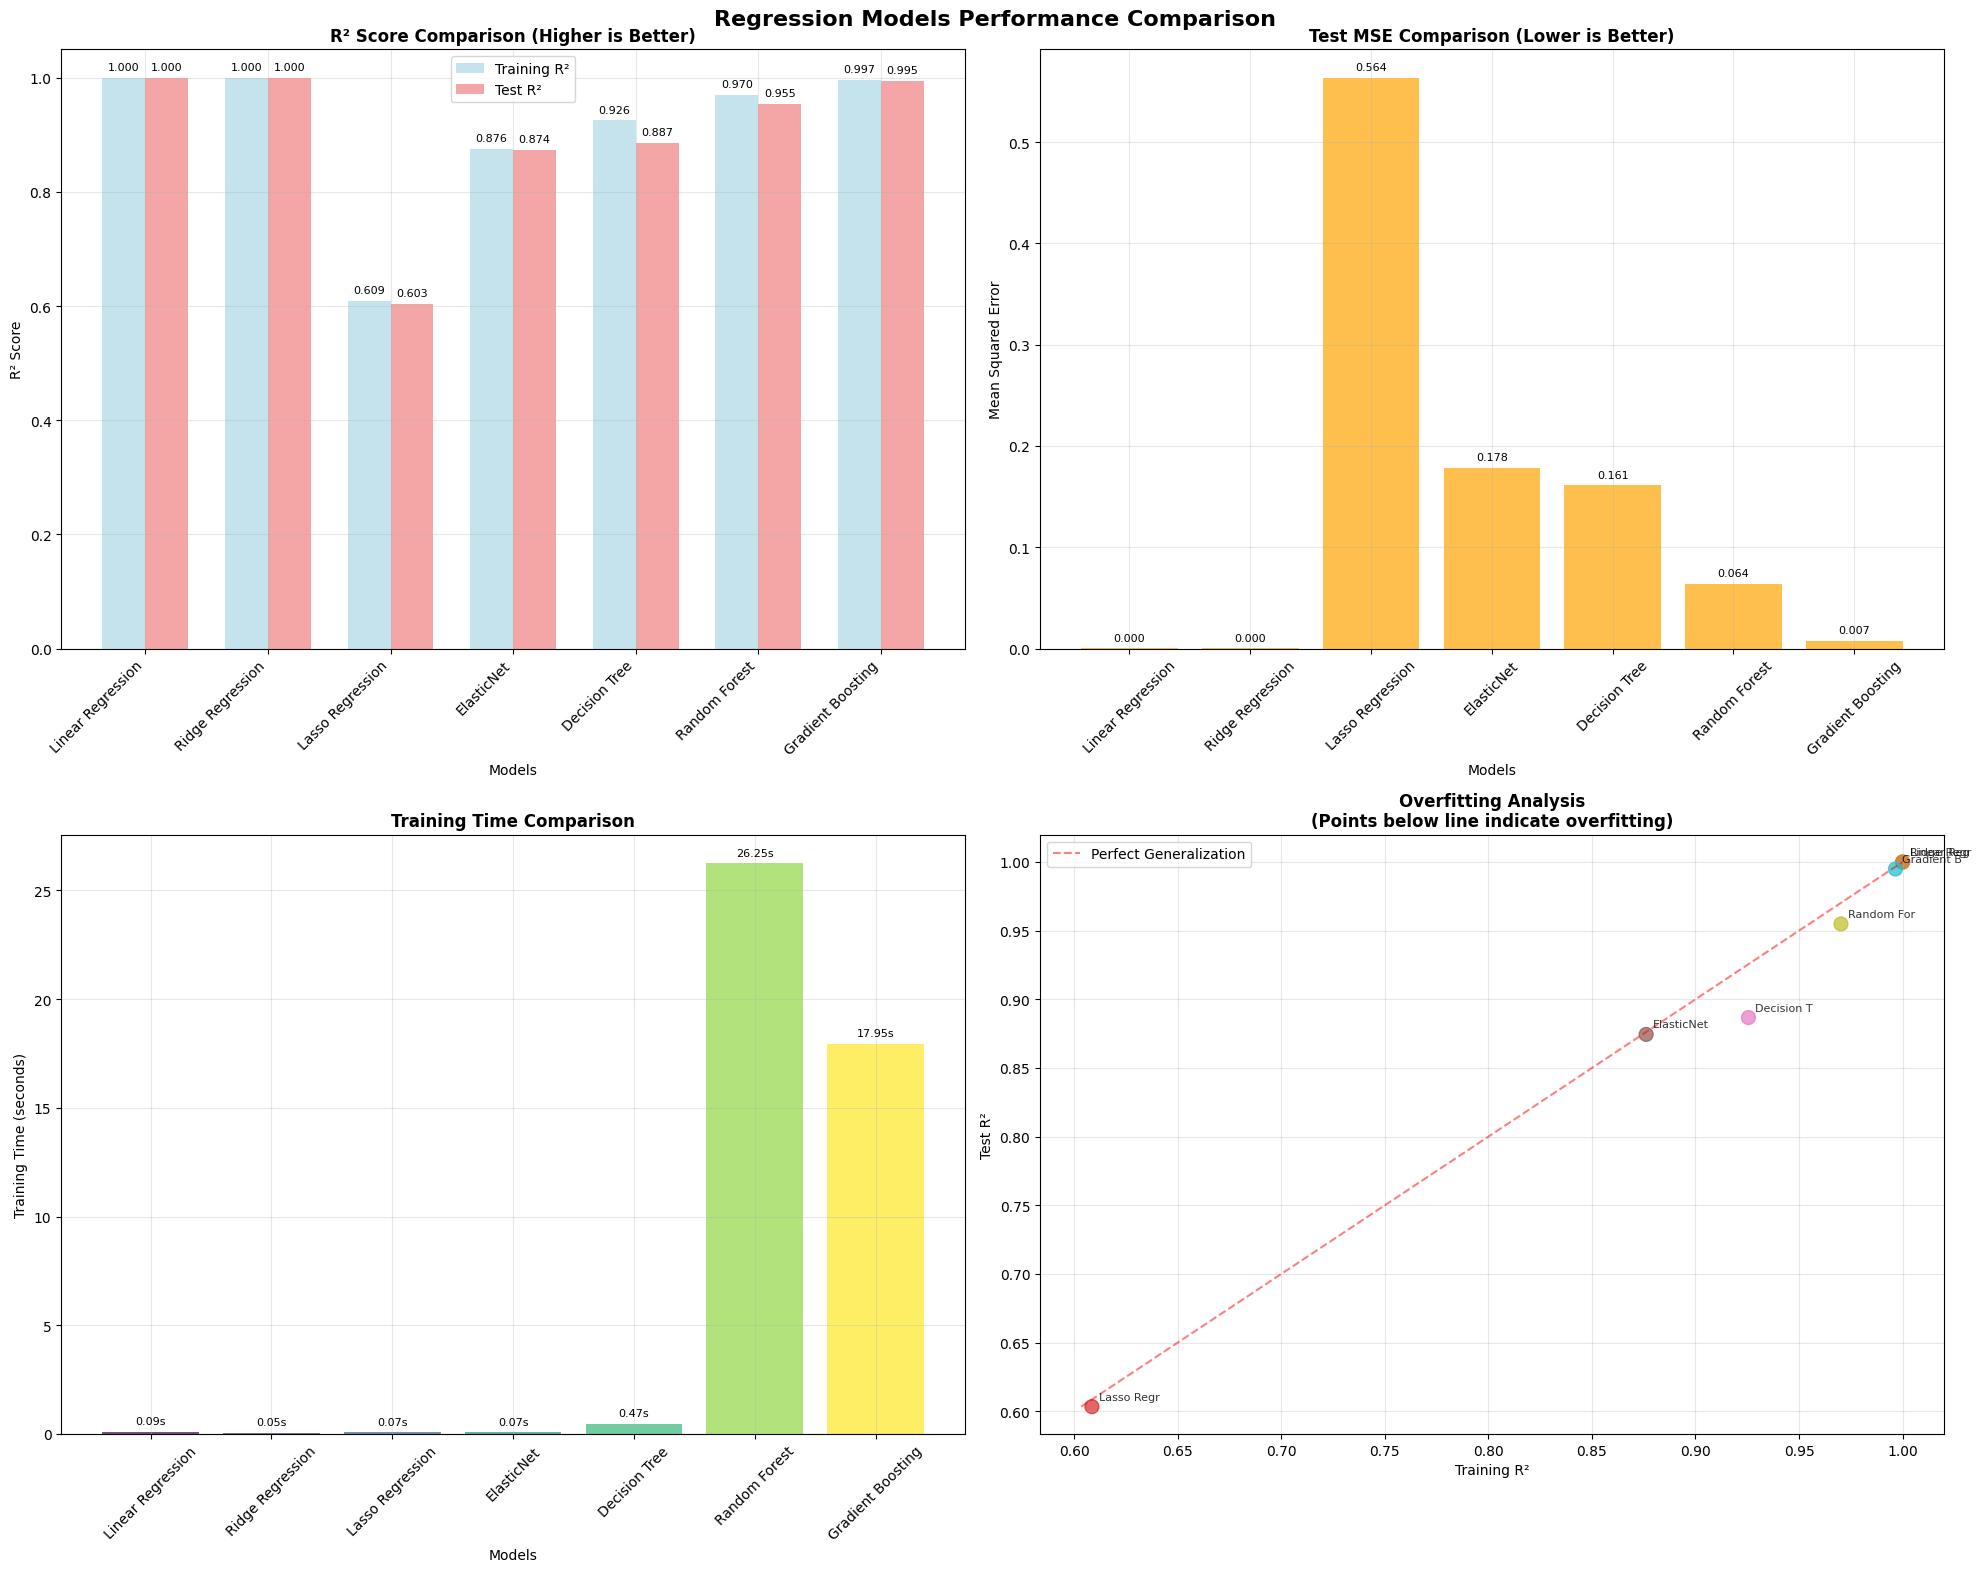


📋 PERFORMANCE SUMMARY TABLE:
            Model  Test_R²  Test_MSE  Test_MAE  Overfitting_Gap  Training_Time(s)
Linear Regression   1.0000    0.0000    0.0025           0.0000            0.0882
 Ridge Regression   1.0000    0.0000    0.0025           0.0000            0.0501
Gradient Boosting   0.9949    0.0072    0.0680           0.0016           17.9510
    Random Forest   0.9549    0.0641    0.2024           0.0153           26.2503
    Decision Tree   0.8867    0.1610    0.3223           0.0389            0.4666
       ElasticNet   0.8744    0.1784    0.3397           0.0017            0.0670
 Lasso Regression   0.6034    0.5635    0.6036           0.0052            0.0676


In [28]:
# Visualizations for Model Comparison
print("📊 MODEL COMPARISON VISUALIZATIONS:")
print("="*40)

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Regression Models Performance Comparison', fontsize=16, fontweight='bold')

# 1. R² Score Comparison
ax1 = axes[0, 0]
models_list = list(results_df.index)
train_r2 = results_df['train_r2'].values
test_r2 = results_df['test_r2'].values

x_pos = np.arange(len(models_list))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, train_r2, width, label='Training R²', alpha=0.7, color='lightblue')
bars2 = ax1.bar(x_pos + width/2, test_r2, width, label='Test R²', alpha=0.7, color='lightcoral')

ax1.set_xlabel('Models')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Score Comparison (Higher is Better)', fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models_list, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 2. MSE Comparison
ax2 = axes[0, 1]
test_mse = results_df['test_mse'].values
bars = ax2.bar(models_list, test_mse, color='orange', alpha=0.7)
ax2.set_xlabel('Models')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Test MSE Comparison (Lower is Better)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, test_mse):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(test_mse)*0.01,
             f'{value:.3f}', ha='center', va='bottom', fontsize=8)

# 3. Training Time Comparison
ax3 = axes[1, 0]
training_times_values = results_df['training_time'].values
colors = plt.cm.viridis(np.linspace(0, 1, len(models_list)))
bars = ax3.bar(models_list, training_times_values, color=colors, alpha=0.7)
ax3.set_xlabel('Models')
ax3.set_ylabel('Training Time (seconds)')
ax3.set_title('Training Time Comparison', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, training_times_values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(training_times_values)*0.01,
             f'{value:.2f}s', ha='center', va='bottom', fontsize=8)

# 4. Overfitting Analysis (Train vs Test R²)
ax4 = axes[1, 1]
ax4.scatter(train_r2, test_r2, s=100, alpha=0.7, c=range(len(models_list)), cmap='tab10')

# Add diagonal line (perfect generalization)
max_r2 = max(max(train_r2), max(test_r2))
min_r2 = min(min(train_r2), min(test_r2))
ax4.plot([min_r2, max_r2], [min_r2, max_r2], 'r--', alpha=0.5, label='Perfect Generalization')

# Add model labels
for i, model in enumerate(models_list):
    ax4.annotate(model[:10], (train_r2[i], test_r2[i]), xytext=(5, 5), 
                textcoords='offset points', fontsize=8, alpha=0.8)

ax4.set_xlabel('Training R²')
ax4.set_ylabel('Test R²')
ax4.set_title('Overfitting Analysis\n(Points below line indicate overfitting)', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance Summary Table
print(f"\n📋 PERFORMANCE SUMMARY TABLE:")
print("="*35)
summary_df = pd.DataFrame({
    'Model': results_df.index,
    'Test_R²': results_df['test_r2'],
    'Test_MSE': results_df['test_mse'],
    'Test_MAE': results_df['test_mae'],
    'Overfitting_Gap': results_df['train_r2'] - results_df['test_r2'],
    'Training_Time(s)': results_df['training_time']
}).round(4)

summary_df = summary_df.sort_values('Test_R²', ascending=False)
print(summary_df.to_string(index=False))

### Analysis for best model 

🏆 BEST MODEL DETAILED ANALYSIS:
🥇 Best Model: Linear Regression
📊 Performance Metrics:
   Test R²: 1.0000
   Test MSE: 0.0000
   Test MAE: 0.0025
   Training Time: 0.09s

📈 PREDICTION ANALYSIS:


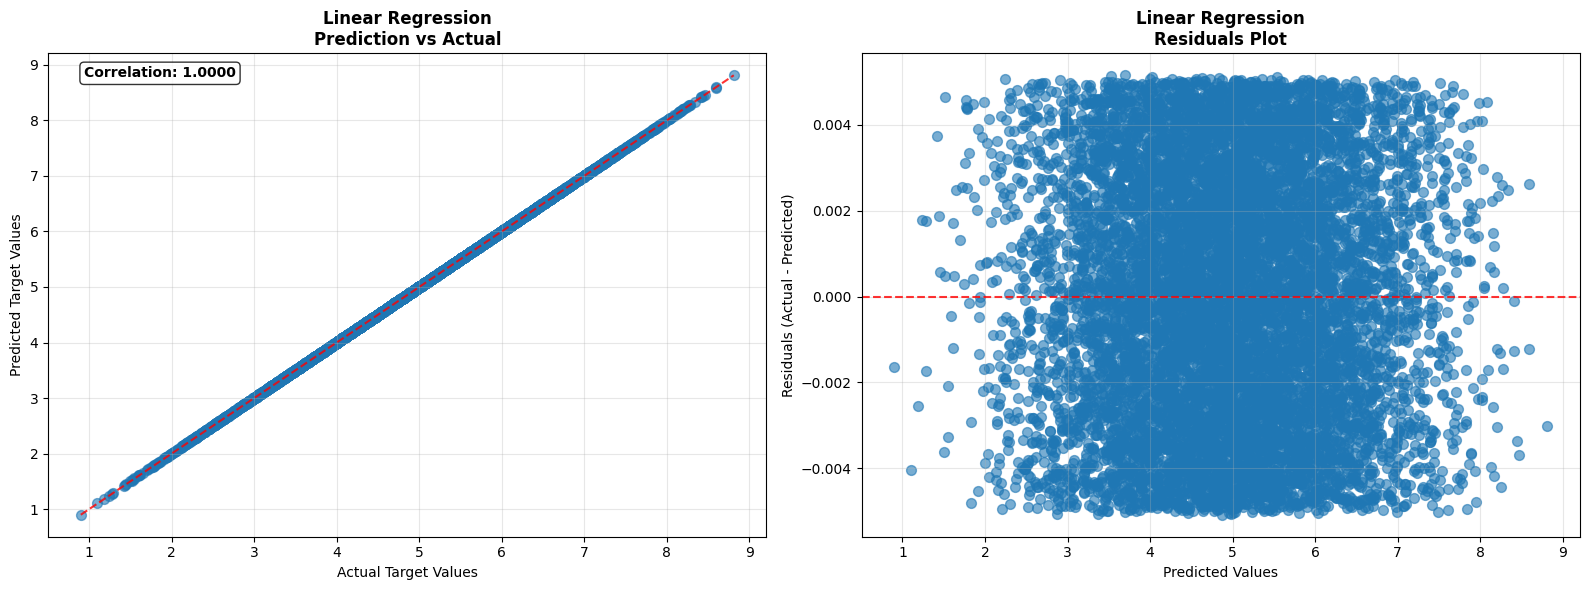


📊 PREDICTION STATISTICS:
Residuals Statistics:
   Mean: -0.000023
   Std: 0.0029
   Min: -0.0051
   Max: 0.0052

🎯 FINAL ASSESSMENT:
✅ Best Model: Linear Regression
📈 Performance Level: Excellent
📊 Model explains 100.0% of the variance in target
⚡ Training efficiency: 0.09 seconds

🎉 Regression analysis completed!
💡 Recommendation: Use Linear Regression for production predictions
🏆 The best model is: LinearRegression()


In [31]:
# Best Model Analysis and Predictions
print("🏆 BEST MODEL DETAILED ANALYSIS:")
print("="*40)

# Get the best model based on test R²
best_model_name = results_df['test_r2'].idxmax()
best_model = models[best_model_name]

print(f"🥇 Best Model: {best_model_name}")
print(f"📊 Performance Metrics:")
print(f"   Test R²: {results_df.loc[best_model_name, 'test_r2']:.4f}")
print(f"   Test MSE: {results_df.loc[best_model_name, 'test_mse']:.4f}")
print(f"   Test MAE: {results_df.loc[best_model_name, 'test_mae']:.4f}")
print(f"   Training Time: {results_df.loc[best_model_name, 'training_time']:.2f}s")

# Make predictions with the best model (using unscaled data)
y_pred_best = best_model.predict(X_test)

# Prediction Analysis
print(f"\n📈 PREDICTION ANALYSIS:")
print("="*25)

# Create prediction vs actual plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Prediction vs Actual scatter plot
ax1 = axes[0]
ax1.scatter(y_test, y_pred_best, alpha=0.6, s=50)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', alpha=0.8)
ax1.set_xlabel('Actual Target Values')
ax1.set_ylabel('Predicted Target Values')
ax1.set_title(f'{best_model_name}\nPrediction vs Actual', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Calculate and display correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(y_test, y_pred_best)
ax1.text(0.05, 0.95, f'Correlation: {corr:.4f}', transform=ax1.transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontweight='bold')

# 2. Residuals plot
ax2 = axes[1]
residuals = y_test - y_pred_best
ax2.scatter(y_pred_best, residuals, alpha=0.6, s=50)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.8)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals (Actual - Predicted)')
ax2.set_title(f'{best_model_name}\nResiduals Plot', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prediction Statistics
print(f"\n📊 PREDICTION STATISTICS:")
print("="*30)
print(f"Residuals Statistics:")
print(f"   Mean: {residuals.mean():.6f}")
print(f"   Std: {residuals.std():.4f}")
print(f"   Min: {residuals.min():.4f}")
print(f"   Max: {residuals.max():.4f}")

# Performance interpretation
r2_score_best = results_df.loc[best_model_name, 'test_r2']
if r2_score_best > 0.8:
    performance_level = "Excellent"
elif r2_score_best > 0.6:
    performance_level = "Good"
elif r2_score_best > 0.4:
    performance_level = "Moderate"
else:
    performance_level = "Poor"

print(f"\n🎯 FINAL ASSESSMENT:")
print("="*20)
print(f"✅ Best Model: {best_model_name}")
print(f"📈 Performance Level: {performance_level}")
print(f"📊 Model explains {r2_score_best*100:.1f}% of the variance in target")
print(f"⚡ Training efficiency: {results_df.loc[best_model_name, 'training_time']:.2f} seconds")

# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    print(f"\n🔍 TOP 5 MOST IMPORTANT FEATURES:")
    print("="*35)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    for i, (_, row) in enumerate(feature_importance.head().iterrows(), 1):
        print(f"   {i}. {row['Feature']:20} | {row['Importance']:.4f}")

print(f"\n🎉 Regression analysis completed!")
print(f"💡 Recommendation: Use {best_model_name} for production predictions")
print(f"🏆 The best model is: {best_model}")

## Saving best model 

In [36]:
import joblib
joblib.dump(best_model, r'D:\best_linear_regression_model.pkl')
print(f"✅ Best model ({best_model_name}) saved successfully as 'D:\\best_linear_regression_model.pkl'")

✅ Best model (Linear Regression) saved successfully as 'D:\best_linear_regression_model.pkl'
